In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

In [2]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv',# 흑백 사진으로 ..???????? 칼라는 RGB값..3개...??????
                  delimiter=',', 
                  skiprows=1) 
data.shape


(100, 785)

5.0


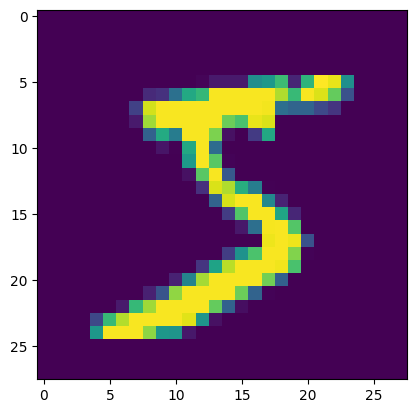

In [6]:
import matplotlib.pyplot as plt
print(data[0,0])
img= data[0, 1:].reshape(28,28)
plt.imshow(img)